# Objectifs du cours

* Python I : Outils de bases pour les scientifiques
* Python II : Programmation orientée objet. Projet informatique (second semestre)

Python I : 

* Utilisation de numpy (aujourd'hui)
* Approfondissement de Python
* Statistiques, ajustement de courbes
* Equations différentielles et calcul numérique avec la libraire scipy.
* Transformée de Fourier

* TP (interfaçage instruments, date à préciser).

## Installation de Python

* Il existe plusieurs interpréteurs open source de Python. Le principal est CPython
* Il est fortement conseillé d'installer Anaconda et Python >3.7 (quelque soit le système d'exploitation)

## Comment exécuter Python

* **Jupyter notebook** : très pratique (compte rendu de TP, exercices, cours). Pas pour des projets
* Spyder : éditeur de texte adapté à Python et l'environnement scientifique (à la matlab)
* IPython (inclus dans spyder) : terminal interactif. Faire des essais avant de copier dans un programme
* Console : interface graphique, test automatique, ...

Rq : les TDs et l'examen se font sur des jupyter notebooks

# Plan du cours

Aujourd'hui : Bases de python. 

* Quelques types de bases de python
* Structures de contrôle
* numpy
* matplotlib

# Types de données

## Nombres

* entiers : pas de limite de tailles
* réels : flottant (float). Par défaut 64bits, précision relative de environ $10^{-15}$
* Complexe : deux réels ; `a = 1 + 3J`
* +, -, \*, /, \*\* (puissance)
* Modulo, division entière

In [ ]:
2**534

In [ ]:
(1 + 10**-13) - 1

In [ ]:
z = 1 + 3J
z.real

In [ ]:
z.conjugate()

In [ ]:
(1+3J).conjugate()

In [ ]:
2342435%7

In [ ]:
2342435//7

## Booléens 

* `True` et `False`
* Comparaison : `>`, `>=`, `==`, `<=`,  `<`, `!=`
* Opérations : and, or et not (attention aux priorités)
* "évaluation paresseuse"

In [1]:
# Priorité  ??? Il faut toujours mettre des parenthèses
print(True or False and False)
print( (True or False) and False)
print(True or (False and False))
print(False and False or True)

True
False
True
True


In [3]:
from math import sqrt
x = -1

# a and b => si a return b else return False
x>=0 and sqrt(x)>2
#if x>0:
#    return sqrt(x)>2
# else:
#    return False
# (x>=0) & (sqrt(x)>2)

ValueError: math domain error

## Chaînes de caractères (str)
* Plusieurs façon d'écrire une chaine : ", ', """, ''' .


In [4]:
s0 = 'Bonjour'
s1 = "Pierre"
s2 = "Aujourd'hui"

In [5]:
s3 = """Une chaine
sur plusieurs 
lignes"""

print(s3)

Une chaine
sur plusieurs 
lignes


## Les listes

* Elles peuvent contenir n'importe quel type de donnée
* Les indices commencent par 0
* Index négatif : par la fin (modulo la taille de la liste)
* iterateur : par exemple `range`. 

In [6]:
# Indices
l = ['Pierre', 34, 3.1415]


In [9]:
m = ['Bonjour', l, sqrt]
m[2](2)

1.4142135623730951

In [13]:
l[-1]

3.1415

La méthode .append() modifie la liste. C'est toujours la même liste (comme on rajoute une page dans un classeur).

In [14]:
l = ['Pierre', 34, 3.1415]
print(l)
print(l.append(25))

['Pierre', 34, 3.1415]
None


In [15]:
print(l)

['Pierre', 34, 3.1415, 25]


In [16]:
l = ['Pierre', 34, 3.1415]
m = l
m.append(14)
print(l)

['Pierre', 34, 3.1415, 14]


In [19]:
l = ['Pierre', 34, 3.1415]
l.append(l)
l[-1][-1][-1][-1][0]

'Pierre'

## Créer une liste à partir d'une autre liste

* Boucle `for`
* Liste comprehension []
* `list.append` : méthode de l'objet liste

In [23]:
liste_initiale = [1, -34, 23, 2.]

liste_finale = []
for elm in liste_initiale:
#    print(elm)
    liste_finale.append(elm**2)
print(liste_finale)

[elm**2 for elm in liste_initiale]


liste_finale = []
for elm in liste_initiale:
    if elm>0:
        liste_finale.append(sqrt(elm))

[sqrt(elm) for elm in liste_initiale if elm>0]

[1, 1156, 529, 4.0]


[1.0, 4.795831523312719, 1.4142135623730951]

## Parcourir une liste
* ``for``
* enumerate
* zip

In [25]:
ma_liste = ['Dupont', 'Martin', 'Dubois']
for name in ma_liste:
    print(name)
    
for i, name in enumerate(ma_liste):
    print(f'Le nom numéro {i} est {name}')

Dupont
Martin
Dubois
Le nom numéro 0 est Dupont
Le nom numéro 1 est Martin
Le nom numéro 2 est Dubois


In [26]:
liste_age = [12, 35, 23]
for age, name in zip(liste_age, ma_liste):
    print(f"{name} a {age} ans.")

Dupont a 12 ans.
Martin a 35 ans.
Dubois a 23 ans.


# Structures de contrôle

## Boucles 
* while
* for (voir les listes)

## Tests 
* if, elif, else

## Fonctions 

```
def nom_fonction(arg1, arg2, ...):
       ...
       return out1, out2
```

* Argument optionel, argument nommé
* Il peut y avoir plusieurs return au sein d'une fonction
* Documentation ≠ commentaire

In [29]:
def est_premier(n):
    i = 2
    while i**2<=n:
        if n%i==0:
            return False
        i += 1
    return True

est_premier(2017)

True

In [31]:
def liste_nombre_premiers(N):
    return [i for i in range(3, N) if est_premier(i)]
    
liste_nombre_premiers(100)

[3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [32]:
def exponentielle(x, precision=1E-9):
    """ Calcul de la fonction e**x
    
    parametre : 
        x : nombre"""
    result = 0
    n = 1
    term = 1 # Initial value
    while abs(term)>precision :
        result = result + term
        term = term * x/n
        n = n + 1
    return result
    

In [40]:
exponentielle(x=2, precision=1E-13)
exponentielle(precision=1E-13, x=2)

7.389056098930604

In [42]:
x = 2
exponentielle(x=3)
print(x)

2


In [34]:
exponentielle(2, 1E-13)

7.389056098930604

In [ ]:
exponentielle(precision=1E-10, x=1)

In [ ]:
exponentielle?

# Règles typographyques

## Variables
* Des noms explicites
* mots en lettres minucules séparés par des ```_``` pour les variables et les fonctions
* Possibilité d'utiliser des majuscules pour des constantes.


## Code
* indentations de 4 espaces (touche tabulation par défaut)
* lignes vides avant et après chaque fonction
* espace autour du ```=``` pour les variables (mais pas pour les arguments par défauts d'une fonctions)
* éviter les lignes trops longues : soit avec des variables intermédiaires soit en distribuant la fonction sur plusieurs lignes ( le plus simple est de le faire avec des parenthèses).

In [44]:
( 1 + 
  2 + 
  4 + 
  6)

13

# Les tableaux `numpy`

* `numpy` est la librairie qui permet de manipuler de larges tableaux de données
* Elle évite de devoir faire des boucles
* Elle contient des fonctions qui ne sont pas dans math
* En pratique, on n'utilise jamais le module math

## Plusieurs utilisations :
* simulations numériques
* données expérimentales
* graph

## Remarque:
Taille fixée à la création. Tous les éléments de même type et de type fini (int64 pour les entiers)

In [49]:
#from numpy import *
import numpy as np

a = np.array([1, 4, 5], dtype=complex)
print(a)
a.dtype

[1.+0.j 4.+0.j 5.+0.j]


dtype('complex128')

In [54]:
a = np.array([1, 3, 5])
a[1] = 60.598 #+ 3J
a

array([ 1, 60,  5])

In [56]:
np.sin(a)

array([ 0.84147098, -0.30481062, -0.95892427])

In [ ]:
# Exemples


In [57]:
# Il ne faut pas utiliser le module math avec des tableaux numpy
import math

a = np.array([1, 5, 9])
math.sin(a)

TypeError: only size-1 arrays can be converted to Python scalars

In [58]:
# Comparaison de la vitesse entre une liste et un tableau 
a = np.random.rand(1000000)

%timeit a**2

def carre(x):
    return [elm**2 for elm in x]
b = list(a)

%timeit carre(b)

799 µs ± 32.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
85.1 ms ± 893 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
def gaussienne(x):
    return np.exp(-x**2)



In [62]:
def f(x, y):
    return x+y

f('Bonjour', 'tout le monde')

'Bonjourtout le monde'

In [64]:
gaussienne(1)

0.3678794411714424

In [65]:
# Boucle for avec un tableau
def carre_boucle(x):
    out = np.zeros(len(x))
    for i in range(len(x)):
        out[i] = x[i]**2
    return out

%timeit carre_boucle(b)

129 ms ± 979 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Avantages (et inconvénients) des tableaux
* La taille et le type de donnée est fixé à la création du tableau



In [ ]:
a = np.array([1, 2, 4])
a[1] = 3.14
a

In [ ]:
a = np.array([1, 2, 4], dtype='float')
a[1] = 3.14

a

In [ ]:
np.arange(10, dtype='float')

# Création d'un tableau
Il existe plusieurs fonctions pour créer un tableau.

* array :  partir d'une liste
* zeros, ones, eye
* arange
* linspace, logspace
* np.random.rand, ...
* loadtxt
* load/save

Le type est déterminé automatiquement. On peut le forcer avec l'argument dtype

In [68]:
np.linspace(start=0, stop=1, num=10, endpoint=False)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [69]:
# Intervalle entre 0 et 1 avec N points.
# C'est inconsistant
# ATTENTION ATTENTION ATTENTION
a = 0
b = 1
N = 1000
dx = (b-a)/N
x = np.linspace(a, b, N)

In [70]:
x = a + np.arange(N)*dx
x = np.linspace(a, b, N, endpoint=False)

In [ ]:
# logspace
# rand

In [71]:
# Import / export
a = np.random.normal(loc=1, scale=.1, size=5)
np.savetxt('test.txt', a)

b = np.loadtxt('test.txt')
b

array([1.06596375, 1.09458767, 1.03338832, 0.97360153, 1.06267259])

In [72]:
a = np.random.normal(loc=1, scale=.1, size=1000000)
np.savetxt('test_long.txt', a)


In [73]:
%timeit np.loadtxt('test_long.txt')

196 ms ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
np.loadtxt?

In [74]:
a = np.random.normal(loc=1, scale=.1, size=1000000)
np.save('test_long.npy', a)


In [75]:
%timeit np.load('test_long.npy')

1.05 ms ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Créer une fonction vectorisée

C'est une fonction qui calcule sur un tableau élément par élément



In [ ]:
x = np.linspace(-1, 1, 51, endpoint=False)*np.pi

In [ ]:
# Souvent il n'y a rien a faire
np.sin(x)

def ma_fonction(x):
    return np.sin(x)**2 + np.cos(x)**2
ma_fonction(x)

In [78]:
# Sinon, vectorize
# Mais il existe des solutions pour éviter d'avoir à 
# l'utiliser (c.f. prochaine partie)
def mafonction_simple(a):
#    print('Bonjour')
    if a>0:
        return a
    else:
        return -a

#mafonction_simple(np.linspace(-1, 1))
mafonction = np.vectorize(mafonction_simple)
mafonction(np.linspace(-1, 1))
# On peut utiliser un décorateur

array([1.        , 0.95918367, 0.91836735, 0.87755102, 0.83673469,
       0.79591837, 0.75510204, 0.71428571, 0.67346939, 0.63265306,
       0.59183673, 0.55102041, 0.51020408, 0.46938776, 0.42857143,
       0.3877551 , 0.34693878, 0.30612245, 0.26530612, 0.2244898 ,
       0.18367347, 0.14285714, 0.10204082, 0.06122449, 0.02040816,
       0.02040816, 0.06122449, 0.10204082, 0.14285714, 0.18367347,
       0.2244898 , 0.26530612, 0.30612245, 0.34693878, 0.3877551 ,
       0.42857143, 0.46938776, 0.51020408, 0.55102041, 0.59183673,
       0.63265306, 0.67346939, 0.71428571, 0.75510204, 0.79591837,
       0.83673469, 0.87755102, 0.91836735, 0.95918367, 1.        ])

In [79]:
# Il faut connaitre l'origine de cette erreur
if x>0:
    print('Bonjour')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Fonctions utiles de numpy

* Fonction mathématique véctorisée: `sin`, `cos`, `tan`, `exp`, `log`, `arcsin`, `arccos`, `arctan`, `arctan2`, ...
* Fonction sur les tableaux : `mean`, `min`, `max`, `sum`, `prod`, `std`, `var`
* Tri : `sort`, `argsort`

De façon générale, toutes les opérations usuelles existent, il faut juste trouver le bonne fonction !



In [ ]:
a = np.random.rand(10)
a.max() # method
np.max(a) # fonction

In [ ]:
np.arctan2(-1, -1) # arctan(arg1/arg2)

# Indexer un tableau

* Slices 
    * Tous les éléments sauf le premier
    * Sauf le dernier
    * Un élément sur deux
* Indexer avec un tableau d'entier
* Indexer avec un tableau de booléens


In [ ]:
import numpy as np


In [ ]:
x = np.linspace(-1, 1, 50, endpoint=False)
x[2:9]
x[9:12]

In [ ]:
x[4:11:2]
# x[start:stop:step], comme range ou arange

In [ ]:
# tout sauf le dernier
x[:-1]

In [ ]:
# Les deux derniers
x[-2:]

In [ ]:
# La différence entre deux éléments consécutifs (dérivée numérique)
x[1:] - x[:-1]

In [ ]:
# Indexer avec un tableau d'entier
indices = np.array([1, 5, 10])
x[indices]

In [ ]:
# Par exemple : argsort
# Les trois éléments les plus petits
x = np.random.rand(10)
x

In [ ]:
x.argsort()

In [ ]:
indices =  x.argsort()[:3]

In [ ]:
x[indices]

In [ ]:
# Avec un tableau de booléens
x = np.random.rand(5)
x

In [ ]:
masque = np.array([True, False, False, True, True])
x[masque] = [1, 2, 5]
x

In [ ]:
x>0.5

In [ ]:
x[x>0.5]

In [ ]:
~(x==3) ^ (x<0.5)

In [ ]:
~False + 1

In [ ]:
def val_abs(x):
    res = np.zeros(len(x))
    res[x>0] = x[x>0]
    res[x<=0] = -x[x<=0]
    return res

In [ ]:
x[:, 1]

# Tracer des graphs

* Initialiser l'affichage
    * c'est automatique dans spyder (à vérifier...)
    * C'est automatique dans les jupyter. Il y a plusieurs modes
    * Dans un script c'est plus compliqué (graph interactif ou pas, sortie pdf, ...)
    

* il faut importer les fonctions pour tracer.

In [80]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np

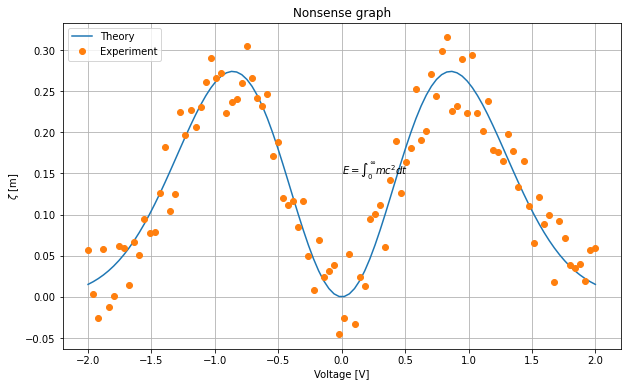

In [81]:
# Données
X = np.linspace(-2,2, 100)
Y = np.sin(X)**2*np.exp(-X**2)
Y_noise = Y + .1*(np.random.rand(len(X))-0.5)

# Graph
plt.figure(figsize=(10, 6))
plt.plot(X,Y, label="Theory")
plt.plot(X,Y_noise, 'o', label="Experiment")
plt.xlabel('Voltage [V]')
plt.ylabel(r'$\zeta$ [m]')
plt.text(0, 0.15, r'$E = \int_0^\infty mc^2 dt$')

plt.title("Nonsense graph")
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('ma_figure.pdf')
plt.savefig('ma_figure.svg')

In [ ]:
s = """Bonjour
Hello
"""
s = 'Bonjour\nHello\n'

In [ ]:
r'$\nu$'

## Quelques commandes graphiques 

* ``plot(X,Y)``
* ``loglog(X,Y)``, ``semilogx(X,Y)``, ``semilogy(X,Y)`` 
* ``errorbar(X,Y, xerr=sig_X, yerr=sig_Y, fmt='o')`` 
* ``xlabel('blabla')``, ``ylabel('blabla')``, ``title('blabla')``
* ``xlim((x_inf, x_sup))``, ``ylim((y_inf, y_sup))`` pour zoomer sur une partie du graph
* ``grid(True)`` pour tracer une grille
* ``subplot(nx,ny,m)`` pour faires plusieurs plots
* ``imshow(image)`` pour tracer une matrice en fausse couleur et ``colorbar()`` pour tracer l'échelle

* ``text(x,y,s)``
* ``savefig(nom_fichier)``. Pour sauver une figure. Le formet est déterminé par l'extension. Utiliser ``pdf`` ou `svg` si on veut modifier le fichier (avec Inkscape par exemple).

Le site web de matplotlib regorge d'exemples avec tout type de graph.